In [1]:
pip install nltk

In [5]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ihiba\AppData\Roaming\nltk_data...


True

In [7]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Load your CSV file
csv_file_path = "movie_corpus.csv"
df = pd.read_csv(csv_file_path)

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Add a new column for sentiment scores
df['sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'] if pd.notnull(x) else 0.0)

# Classify sentiment based on the compound score
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

# Save the updated DataFrame to a new CSV file
updated_csv_file_path = "movie_corpus_with_sentiment.csv"
df.to_csv(updated_csv_file_path, index=False)

# Display the updated DataFrame
print(df.head())


  conversation_id utterance_id speaker          text  sentiment_score  \
0           L1044        L1045      u0  They do not!           0.0000   
1           L1044        L1044      u2   They do to!           0.0000   
2            L984         L985      u0    I hope so.           0.4404   
3            L984         L984      u2     She okay?           0.2263   
4            L924         L925      u0     Let's go.           0.0000   

  sentiment  
0   neutral  
1   neutral  
2  positive  
3  positive  
4   neutral  


In [8]:
pip install wordcloud matplotlib

     ------------------------------------ 152.1/152.1 kB 758.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


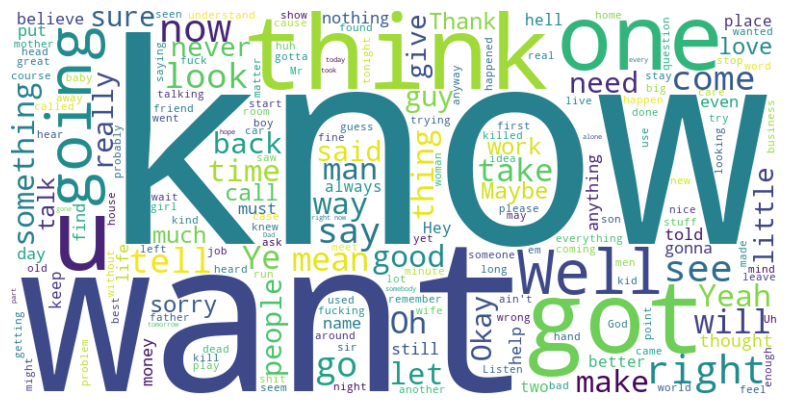

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Concatenate all the text in the 'text' column
all_text = ' '.join(df['text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Calculate word frequencies using Counter
word_frequencies = Counter(all_text.split())

# Save the word frequencies to a CSV file
word_frequencies_df = pd.DataFrame(list(word_frequencies.items()), columns=['word', 'frequency'])
word_frequencies_df.to_csv("word_frequencies.csv", index=False)

# Show the word cloud
plt.show()


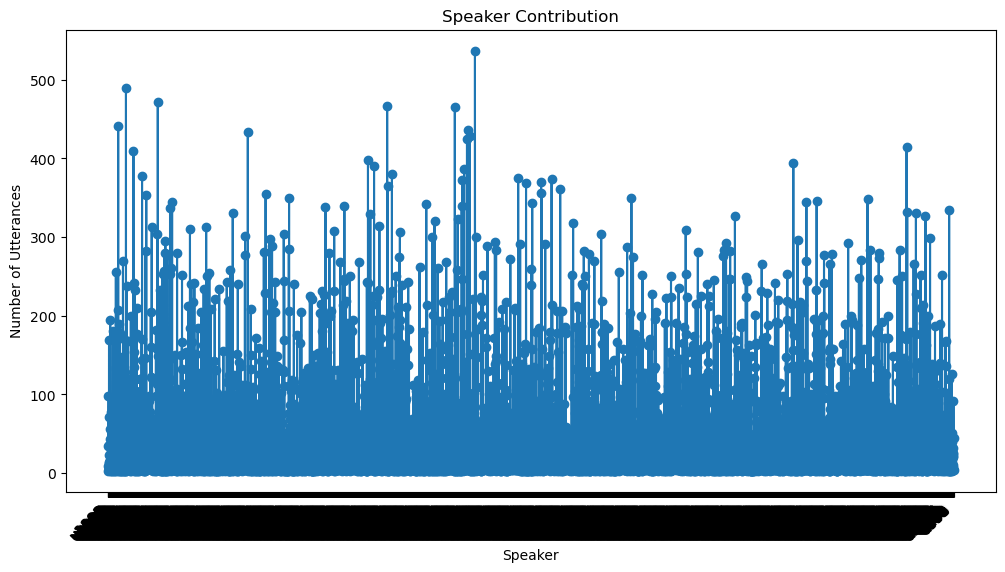

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
csv_file_path = "movie_corpus.csv"
df = pd.read_csv(csv_file_path)

# Group by speaker to count utterances
speaker_contribution = df.groupby('speaker').size().reset_index(name='utterance_count')

# Plot a line chart for each speaker
plt.figure(figsize=(12, 6))
plt.plot(speaker_contribution['speaker'], speaker_contribution['utterance_count'], marker='o')

plt.title('Speaker Contribution')
plt.xlabel('Speaker')
plt.ylabel('Number of Utterances')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Save the line chart as an image (optional)
plt.savefig('speaker_contribution.png')

# Save the data to a CSV file
speaker_contribution.to_csv('speaker_contribution.csv', index=False)

# Show the line chart
plt.show()
